## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Loading Data

In [2]:
try:
    df = pd.read_csv('Mall_Customers.csv')
    print("Dataset loaded successfully.")
    print("First 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("ERROR: 'Mall_Customers.csv' not found.")
    print("Please make sure the file is uploaded to your Colab environment.")
    data = {'CustomerID': range(1, 201),
            'Genre': np.random.choice(['Male', 'Female'], 200),
            'Age': np.random.randint(18, 70, 200),
            'Annual Income (k$)': np.random.randint(15, 137, 200),
            'Spending Score (1-100)': np.random.randint(1, 99, 200)}
    df = pd.DataFrame(data)
    print("\nLoaded a dummy dataframe for demonstration purposes.")

Dataset loaded successfully.
First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Preprocessing Data

In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data has been scaled using StandardScaler.")

Data has been scaled using StandardScaler.


## Finding Optimal 'k' with the Elbow Method

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

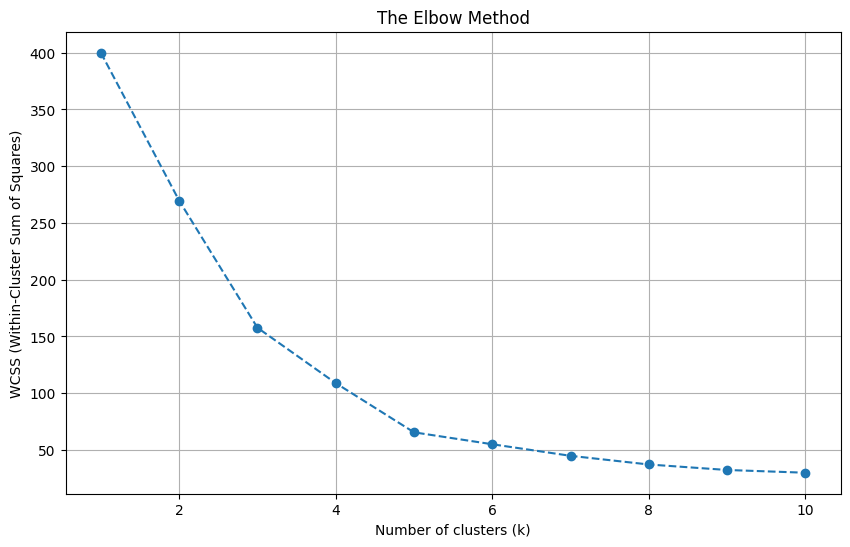

The plot above helps identify the best number of clusters. The 'elbow' is at k=5.


In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()
print("The plot above helps identify the best number of clusters. The 'elbow' is at k=5.")

## Applying K-Means with k=5 and Visualizing Segments

In [7]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)

In [8]:
y_kmeans = kmeans.fit_predict(X_scaled)

In [9]:
df['Cluster'] = y_kmeans + 1

<Axes: >

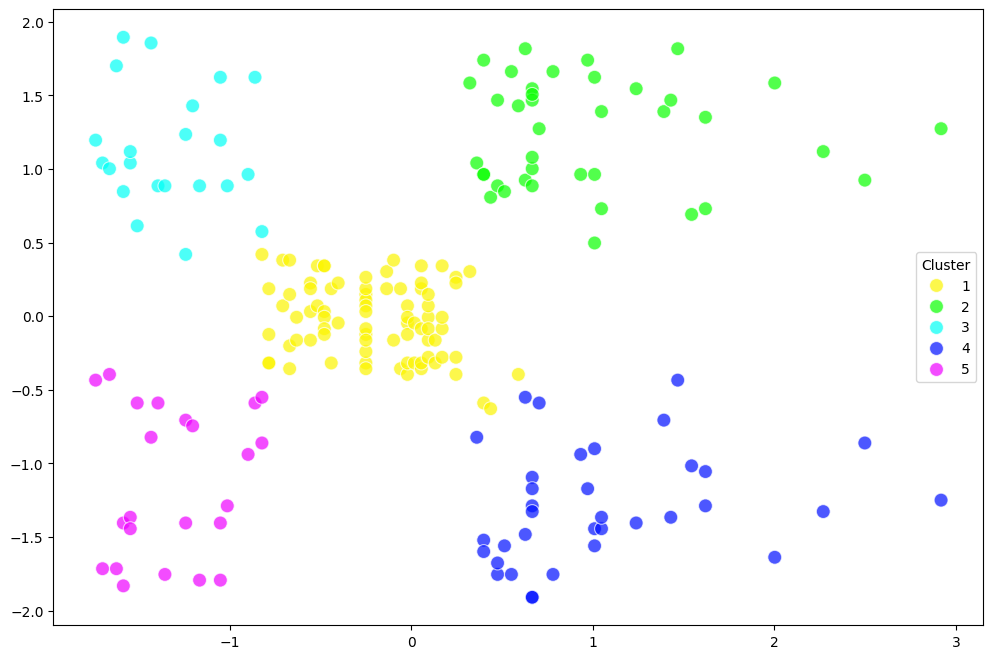

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette=sns.color_palette('hsv', n_colors=optimal_k), s=100, alpha=0.7)

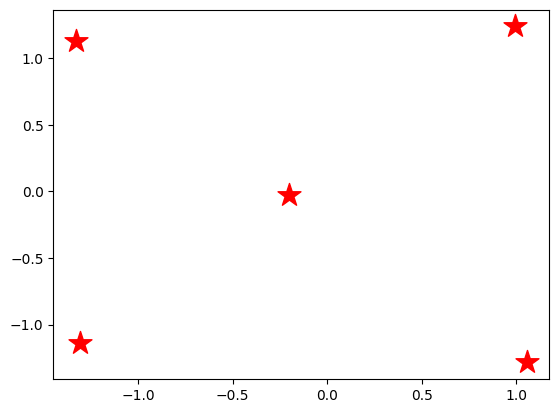

In [11]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='*', label='Centroids')

/tmp/ipython-input-12-4134278410.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


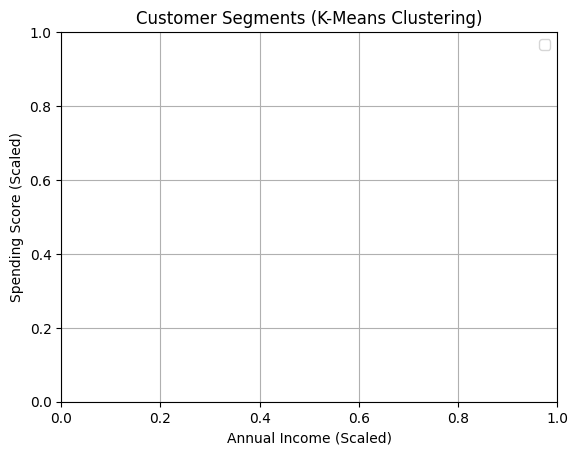

In [12]:
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

## Analyzing Cluster Characteristics and Gender Distribution

In [13]:
cluster_names = {
    1: 'Standard Customers',
    2: 'Target / VIPs',
    3: 'Enthusiasts',
    4: 'Frugal Spenders',
    5: 'Budget-Conscious'
}
df['ClusterName'] = df['Cluster'].map(cluster_names)

In [14]:
print("\nAverage Characteristics per Customer Segment:")
cluster_analysis = df.groupby('ClusterName')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean().round(2)
print(cluster_analysis)


Average Characteristics per Customer Segment:
                    Annual Income (k$)  Spending Score (1-100)    Age
ClusterName                                                          
Budget-Conscious                 26.30                   20.91  45.22
Enthusiasts                      25.73                   79.36  25.27
Frugal Spenders                  88.20                   17.11  41.11
Standard Customers               55.30                   49.52  42.72
Target / VIPs                    86.54                   82.13  32.69


In [15]:
print("\nGender Distribution within Customer Segments:")
gender_distribution = df.groupby(['ClusterName', 'Gender'])['CustomerID'].count().unstack(fill_value=0)
print(gender_distribution)


Gender Distribution within Customer Segments:
Gender              Female  Male
ClusterName                     
Budget-Conscious        14     9
Enthusiasts             13     9
Frugal Spenders         16    19
Standard Customers      48    33
Target / VIPs           21    18


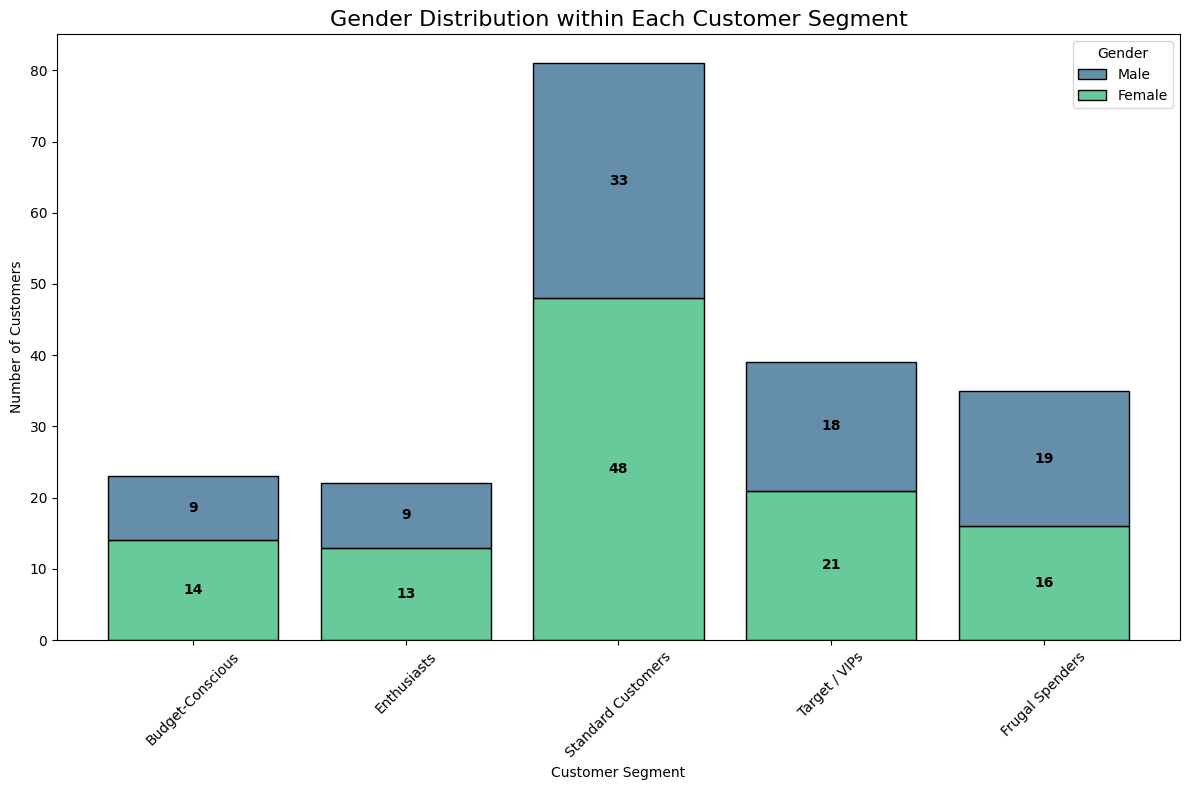


--- Analysis Complete ---


In [16]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='ClusterName', hue='Gender', multiple='stack', shrink=0.8, palette='viridis')

ax.set_title('Gender Distribution within Each Customer Segment', fontsize=16)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Customer Segment')
plt.xticks(rotation=45)

for c in ax.containers:
    labels = [f'{v.get_height():.0f}' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='black', weight='bold')

plt.tight_layout()
plt.show()
print("\n--- Analysis Complete ---")